In [181]:
import numpy as np
import pandas as pd

In [182]:
# создадим два нампаевских массива с предсказанными и фактическими значениями
y     = np.array([0,0,1,1,1,1,0,0,0,1,1,0,0,1,1])
preds = np.array([1,0,1,0,1,1,0,1,0,1,1,0,0,1,0])

In [271]:
# функция для создания матрицы сопряженности
# def conf_matrix (y, preds):
#     cm = np.vstack((y, preds))
#     cm=pd.DataFrame(cm).transpose()
#     cm=cm.rename(columns={0:'True',1:'Preds'})
#     cm=pd.crosstab(cm['True'],cm['Preds'])
#     return cm

In [311]:
def conf_matrix(y, y_pred):
    cm = np.zeros((2, 2))
    for i in range(len(y)): 
        if y[i] == y_pred[i] == 1: # TP
            cm[0][0] += 1
        elif y[i] == y_pred[i] == 0: # TN
            cm[1][1] += 1
        elif y[i] != y_pred[i] and y[i] == 1: # FN
            cm[1][0] += 1
        elif y[i] != y_pred[i] and y[i] == 0: # FP
            cm[0][1] += 1
    return cm

In [312]:
# и создаем таблицу сопряженности
conf_matrix (y,preds)

array([[6., 2.],
       [2., 5.]])

In [323]:
# функция подсчета accuracy
def accuracy (y_,preds_):
    cm = conf_matrix (y_,preds_)
    TP = cm[0][0]
    FP = cm[0][1]
    TN = cm[1][1]
    FN = cm[1][0]
    accuracy = round((TP+TN)/(TP+TN+FP+FN),2)
    return accuracy

In [324]:
accuracy(y, preds)

np.float64(0.73)

In [325]:
# функция подсчета precision
def precision (y_,preds_):
    cm = conf_matrix (y_,preds_)
    TP = cm[0][0]
    FP = cm[0][1]
    precision = round(TP / (TP + FP),2)
    return precision

In [326]:
precision(y,preds)

np.float64(0.75)

In [327]:
# функция подсчета recall
def recall (y_,preds_):
    cm = conf_matrix (y_,preds_)
    TP = cm[0][0]
    FN = cm[1][0]
    recall = round(TP / (TP + FN),2)
    return recall

In [328]:
recall(y,preds)

np.float64(0.75)

In [329]:
# функция подсчета f_score
def f_score (y_,preds_):
    pr = precision(y_,preds_)
    rc = recall(y_,preds_)
    f_score = 2*pr*rc/(pr+rc)
    return f_score

In [330]:
f_score(y,preds)

np.float64(0.75)

In [331]:
# проверяем расчеты
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print(f'accuracy_score \t {round(accuracy_score(y, preds),2)}')
print(f'precision_score\t {precision_score(y, preds)}')
print(f'recall_score \t {recall_score(y, preds)}')
print(f'f1_score \t {f1_score(y, preds)}')

accuracy_score 	 0.73
precision_score	 0.75
recall_score 	 0.75
f1_score 	 0.75


In [322]:
conf_matrix(y,preds)

array([[6., 2.],
       [2., 5.]])

In [350]:
# ROC-кривая
y     = np.array([0,0,1,1,1,1,0,0,0,1,1,0,0,1,1])
probs = np.array([0.5,0.3,0.7,0.8,0.5,0.4,0.7,0.8,0.9,0.7,0.7,0.6,0.8,0.5,0.4])

In [351]:
# функция отрисовки ROC-кривой
import matplotlib.pyplot as plt

def roc_curve (y, probs):
# изначально показатели приравниваем к 1
    fpr = [1]
    tpr = [1]
    
        # создаем цикл для расчета показателей в зависимости от порогов
    
    for thold in sorted(probs):   # сортируем массив по вероятностей по возрастанию
        y_pred = np.where(probs > thold, 1, 0)  # формируем массив в значений 1 / 0 в зависимости от порогового значения вероятности
        cm=conf_matrix(y,y_pred)
        TP = cm[0][0]
        FP = cm[0][1]
        TN = cm[1][1]
        FN = cm[1][0]
        # заполняем массивы значений tpr / fpr для каждого порога вероятности
        tpr.append(TP/(TP+FN))
        fpr.append(FP/(FP+TN))
    
    plt.plot(tpr,fpr)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    
    tpr.append(0)
    fpr.append(0)
    return fpr, tpr


([1,
  np.float64(0.8571428571428571),
  np.float64(0.8571428571428571),
  np.float64(0.8571428571428571),
  np.float64(0.7142857142857143),
  np.float64(0.7142857142857143),
  np.float64(0.7142857142857143),
  np.float64(0.5714285714285714),
  np.float64(0.42857142857142855),
  np.float64(0.42857142857142855),
  np.float64(0.42857142857142855),
  np.float64(0.42857142857142855),
  np.float64(0.14285714285714285),
  np.float64(0.14285714285714285),
  np.float64(0.14285714285714285),
  np.float64(0.0),
  0],
 [1,
  np.float64(1.0),
  np.float64(0.75),
  np.float64(0.75),
  np.float64(0.5),
  np.float64(0.5),
  np.float64(0.5),
  np.float64(0.5),
  np.float64(0.125),
  np.float64(0.125),
  np.float64(0.125),
  np.float64(0.125),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  0])

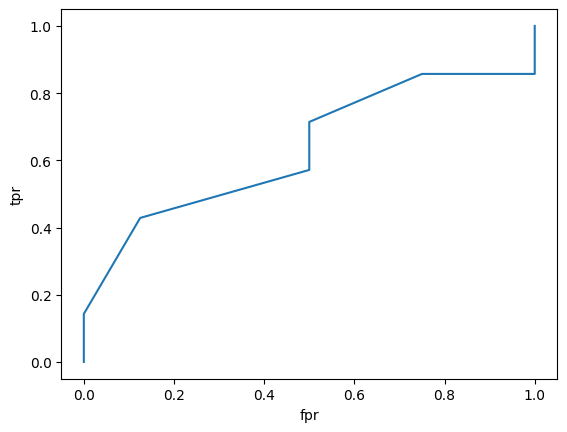

In [352]:
roc_curve(y,probs)

Text(0, 0.5, 'tpr')

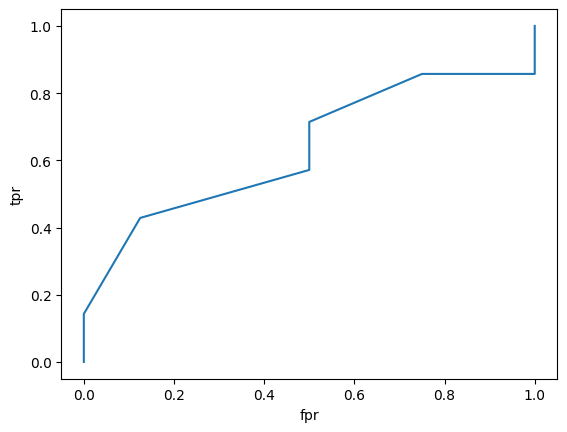

In [353]:
from sklearn.metrics import roc_curve

fpr, tpr, th = roc_curve(y, probs)

plt.plot(tpr,fpr)
plt.xlabel('fpr')
plt.ylabel('tpr')